### Experiment-7 EM Algorithm

In [ ]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531

In [23]:
# Reference Links
# https://www.youtube.com/watch?v=DIADjJXrgps
# https://www.analyticsvidhya.com/blog/2021/05/complete-guide-to-expectation-maximization-algorithm/

In [24]:
# Expectation-Maximization (EM) algorithm

In [25]:
# Given a set of incomplete data, start with a set of initialized parameters.
# Expectation step (E – step): In this expectation step, by using the observed available data of the dataset, we can try to estimate or guess the values of the missing data. Finally, after this step, we get complete data having no missing values.
# Maximization step (M – step): Now, we have to use the complete data, which is prepared in the expectation step, and update the parameters.
# Repeat step 2 and step 3 until we converge to our solution.

In [26]:
# Loading libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture

In [27]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [28]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

Text(0, 0.5, 'Petal Width')

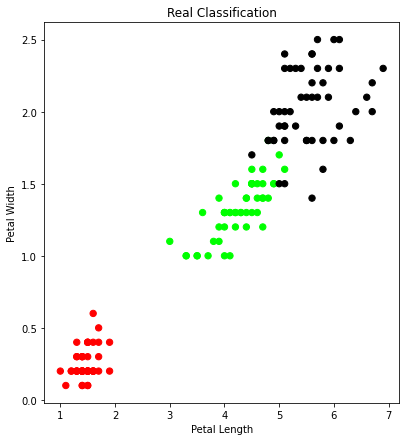

In [29]:
plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

The accuracy score of K-Mean: 
 0.24
The Confusion matrixof K-Mean: 
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


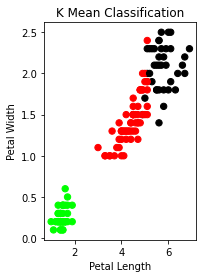

In [30]:
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: \n',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: \n',sm.confusion_matrix(y, model.labels_))


In [31]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

In [32]:
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

Text(0, 0.5, 'Petal Width')

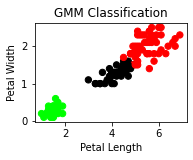

In [33]:
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [34]:
print('The accuracy score of EM: \n',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: \n',sm.confusion_matrix(y, y_gmm))

The accuracy score of EM: 
 0.0
The Confusion matrix of EM: 
 [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


### 2nd Approach

In [35]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal  #Generalisation on one dimensinal data to multi-dimensional
import random

# Data Generation
m1 = [1,1]
m2 = [7,7]
cov1 = [[3,2], [2,3]]
cov2 = [[2,-1], [-1,2]]

x = np.random.multivariate_normal(m1, cov1, size = (350,))
#350 samples for mean and covariance each

y = np.random.multivariate_normal(m2, cov2, size = (350,))

d = np.concatenate((x,y), axis = 0)

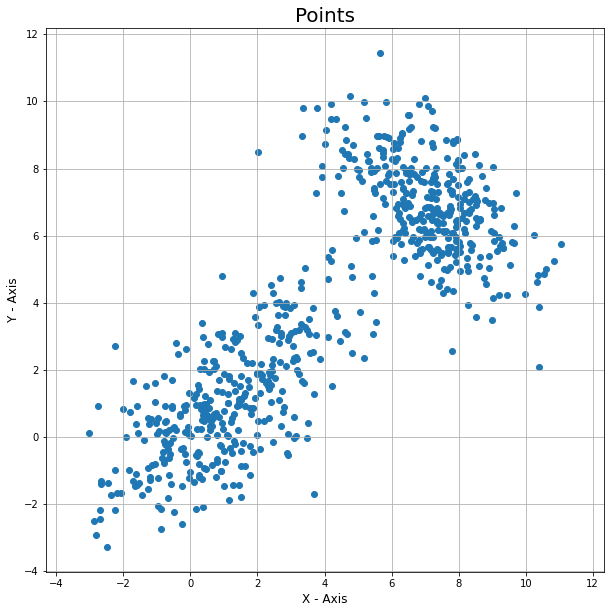

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(d[:,0], d[:,1], marker = 'o')
plt.axis('equal')
plt.xlabel('X - Axis',fontsize = 12)
plt.ylabel('Y - Axis',fontsize = 12)
plt.title('Points', fontsize = 20)
plt.grid()
plt.show()

In [37]:
#Initial assumption or guess for mean and covariance

m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

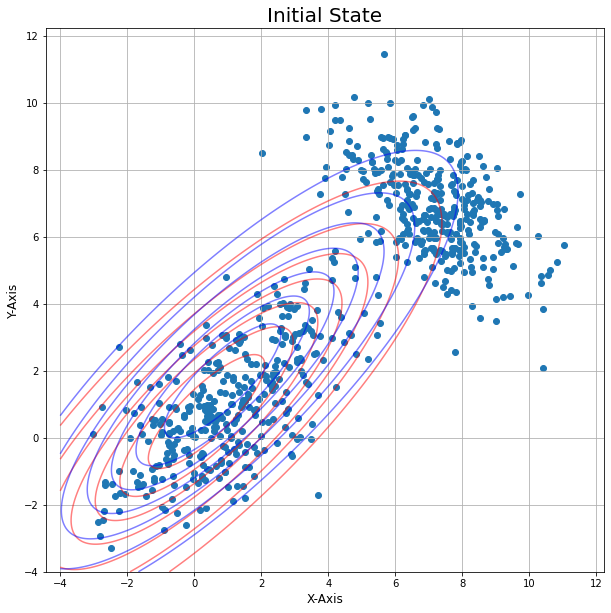

In [38]:
#Initial state plot
x1 = np.linspace(-4,11,350)  
x2 = np.linspace(-4,11,350)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                        # creating the figure and assigning the size
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.axis('equal')                                                                  
plt.xlabel('X-Axis', fontsize=12)                                                  
plt.ylabel('Y-Axis', fontsize=12)                                                  
plt.title('Initial State', fontsize=20)                                            
plt.grid()                                                                        
plt.show()